In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns

sns.set_style('ticks', {"axes.linewidth": "1",'axes.yaxis.grid':False})
current_palette = sns.color_palette()

In [3]:
colors = {
    'falcon-rw-1b': '#d4e1f9',
    'falcon-7b-instruct': '#73bdfe',
    'falcon-40b-instruct': '#2465b6',
    'extra': '#0e355c',
    'TP': '#538c21',
    'PP': '#2f54bc'
}

figoutpath = 'project/figures'

In [4]:
import numpy as np
import pandas as pd

# Throughput and Latency

## Results

| Model               | # Layers | # Heads  | d_model | # TP  | # PP | Batch size      | Input length | Output length | Total latency (s) | Tokens/s | Total output tokens |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   1  | 1 (1280 iter)   |    128       |   128         | 734.13            | 197.19   | 144763              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   1  | 16 (80 iter)    |    128       |   128         | 70.54             | 2049.94  | 144597              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   1  | 32 (40 iter)    |    128       |   128         | 44.07             | 3270.41  | 144127              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   1  | 64 (20 iter)    |    128       |   128         | 31.07             | 4641.21  | 144224              |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   1  | 1 (1280 iter)   |    2048      |   128         | 863.12            | 184.45   | 159204              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   1  | 16 (80 iter)    |    2048      |   128         | 126.45            | 1258.84  | 159178              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   1  | 32 (40 iter)    |    2048      |   128         | 98.88             | 1602.48  | 158458              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   1  | 64 (20 iter)    |    2048      |   128         | 86.02             | 1848.59  | 159015              |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   2  | 1 (1280 iter)   |    128       |   128         | 735.43            | 195.98   | 144132              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   2  | 16 (80 iter)    |    128       |   128         | 70.06             | 2059.51  | 144299              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   2  | 32 (40 iter)    |    128       |   128         | 40.45             | 3538.58  | 143130              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   2  | 64 (20 iter)    |    128       |   128         | 25.94             | 5549.78  | 143959              |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   2  | 1 (1280 iter)   |    2048      |   128         | 864.73            | 183.69   | 158844              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   2  | 16 (80 iter)    |    2048      |   128         | 105.52            | 1508.96  | 159225              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   2  | 32 (40 iter)    |    2048      |   128         | 76.43             | 2087.07  | 159525              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   2  | 64 (20 iter)    |    2048      |   128         | 60.44             | 2632.57  | 159100              |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-rw-1b        | 24       | 32       |  2048   |   2   |   1  | 1 (1280 iter)   |    128       |   128         | 536.99            | 275.28   | 147826              |
| falcon-rw-1b        | 24       | 32       |  2048   |   2   |   1  | 16 (80 iter)    |    128       |   128         | 58.03             | 2551.98  | 148101              |
| falcon-rw-1b        | 24       | 32       |  2048   |   2   |   1  | 32 (40 iter)    |    128       |   128         | 39.86             | 3717.12  | 148167              |
| falcon-rw-1b        | 24       | 32       |  2048   |   2   |   1  | 64 (20 iter)    |    128       |   128         | 31.48             | 4708.78  | 148241              |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-rw-1b        | 24       | 32       |  2048   |   2   |   1  | 1 (1280 iter)   |    2048      |   128         | 642.49            | 249.79   | 160487              |
| falcon-rw-1b        | 24       | 32       |  2048   |   2   |   1  | 16 (80 iter)    |    2048      |   128         | 107.34            | 1488.52  | 159784              |
| falcon-rw-1b        | 24       | 32       |  2048   |   2   |   1  | 32 (40 iter)    |    2048      |   128         | 90.93             | 1759.18  | 159966              |
| falcon-rw-1b        | 24       | 32       |  2048   |   2   |   1  | 64 (20 iter)    |    2048      |   128         | 81.74             | 1963.83  | 160517              |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   4  | 1 (1280 iter)   |    128       |   128         | 746.40            | 193.37   | 144331              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   4  | 16 (80 iter)    |    128       |   128         | 74.35             | 1939.96  | 144240              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   4  | 32 (40 iter)    |    128       |   128         | 41.47             | 3485.17  | 144548              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   4  | 64 (20 iter)    |    128       |   128         | 24.38             | 5913.01  | 144162              |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   4  | 1 (1280 iter)   |    2048      |   128         | 878.38            | 181.10   | 159076              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   4  | 16 (80 iter)    |    2048      |   128         | 96.24             | 1657.00  | 159469              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   4  | 32 (40 iter)    |    2048      |   128         | 62.52             | 2553.50  | 159655              |
| falcon-rw-1b        | 24       | 32       |  2048   |   1   |   4  | 64 (20 iter)    |    2048      |   128         | 45.81             | 3480.71  | 159462              |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-rw-1b        | 24       | 32       |  2048   |   2   |   2  | 1 (1280 iter)   |    128       |   128         | 538.54            | 274.46   | 147811              |
| falcon-rw-1b        | 24       | 32       |  2048   |   2   |   2  | 16 (80 iter)    |    128       |   128         | 53.55             | 2766.56  | 148141              |
| falcon-rw-1b        | 24       | 32       |  2048   |   2   |   2  | 32 (40 iter)    |    128       |   128         | 33.68             | 4383.73  | 147645              |
| falcon-rw-1b        | 24       | 32       |  2048   |   2   |   2  | 64 (20 iter)    |    128       |   128         | 24.30             | 6069.17  | 147488              |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-rw-1b        | 24       | 32       |  2048   |   2   |   2  | 1 (1280 iter)   |    2048      |   128         | 637.41            | 251.46   | 160283              |
| falcon-rw-1b        | 24       | 32       |  2048   |   2   |   2  | 16 (80 iter)    |    2048      |   128         | 89.76             | 1786.14  | 160244              | 
| falcon-rw-1b        | 24       | 32       |  2048   |   2   |   2  | 32 (40 iter)    |    2048      |   128         | 69.61             | 2301.62  | 160228              |
| falcon-rw-1b        | 24       | 32       |  2048   |   2   |   2  | 64 (20 iter)    |    2048      |   128         | 59.63             | 2678.71  | 159722              |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-rw-1b        | 24       | 32       |  2048   |   4   |   1  | 1 (1280 iter)   |    128       |   128         | 518.37            | 285.36   | 147923              |
| falcon-rw-1b        | 24       | 32       |  2048   |   4   |   1  | 16 (80 iter)    |    128       |   128         | 109.68            | 1353.15  | 148413              |
| falcon-rw-1b        | 24       | 32       |  2048   |   4   |   1  | 32 (40 iter)    |    128       |   128         | 96.04             | 1534.66  | 147390              |
| falcon-rw-1b        | 24       | 32       |  2048   |   4   |   1  | 64 (20 iter)    |    128       |   128         | 90.49             | 1640.87  | 148489              |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-rw-1b        | 24       | 32       |  2048   |   4   |   1  | 1 (1280 iter)   |    2048      |   128         | 733.07            | 218.18   | 159945              |
| falcon-rw-1b        | 24       | 32       |  2048   |   4   |   1  | 16 (80 iter)    |    2048      |   128         | 152.50            | 1047.80  | 159794              |
| falcon-rw-1b        | 24       | 32       |  2048   |   4   |   1  | 32 (40 iter)    |    2048      |   128         | 137.44            | 1163.41  | 159894              |
| falcon-rw-1b        | 24       | 32       |  2048   |   4   |   1  | 64 (20 iter)    |    2048      |   128         | 133.15            | 1201.41  | 159970              |




| Model               | # Layers | # Heads  | d_model | # TP  | # PP | Batch size      | Input length | Output length | Total latency (s) | Tokens/s | Total output tokens |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   1  | 1 (1280 iter)   |    128       |   128         |    1655.47        | 45.16    |        75279        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   1  | 16 (80 iter)    |    128       |   128         |    263.03         | 284.74   |        74896        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   1  | 32 (40 iter)    |    128       |   128         |    157.40         | 479.39   |        75455        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   1  | 64 (20 iter)    |    128       |   128         |    93.25          | 813.71   |        75878        |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   1  | 1 (1280 iter)   |    2048      |   128         |    1022.98        | 38.92    |        39820        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   1  | 16 (80 iter)    |    2048      |   128         |    330.25         | 119.99   |        39627        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   1  | 32 (40 iter)    |    2048      |   128         |    270.60         | 146.27   |        39579        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   1  | 64 (20 iter)    |    2048      |   128         |    232.17         | 170.31   |        39540        |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   2  | 1 (1280 iter)   |    128       |   128         |    1666.84        | 45.16    |        75279        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   2  | 16 (80 iter)    |    128       |   128         |    259.44         | 286.85   |        74421        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   2  | 32 (40 iter)    |    128       |   128         |    144.36         | 516.55   |        74572        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   2  | 64 (20 iter)    |    128       |   128         |    90.41          | 821.89   |        74310        |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   2  | 1 (1280 iter)   |    2048      |   128         |    1020.71        | 39.03    |        39838        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   2  | 16 (80 iter)    |    2048      |   128         |    296.54         | 134.62   |        39919        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   2  | 32 (40 iter)    |    2048      |   128         |    233.35         | 171.55   |        40030        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   2  | 64 (20 iter)    |    2048      |   128         |    NaN (OOM)      | NaN      |        NaN          |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   4  | 1 (1280 iter)   |    128       |   128         |    1661.38        | 45.54    |        75661        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   4  | 16 (80 iter)    |    128       |   128         |    260.21         | 292.54   |        76124        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   4  | 32 (40 iter)    |    128       |   128         |    143.09         | 530.22   |        75867        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   4  | 64 (20 iter)    |    128       |   128         |    81.63          | 925.10   |        75516        |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   4  | 1 (1280 iter)   |    2048      |   128         |    1020.92        | 39.17    |        39995        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   4  | 16 (80 iter)    |    2048      |   128         |    259.96         | 152.51   |        39648        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   4  | 32 (40 iter)    |    2048      |   128         |    187.29         | 212.66   |        39830        |
| falcon-7b-instruct  | 32       | 71       |  4544   |   1   |   4  | 64 (20 iter)    |    2048      |   128         |    138.74         | 287.06   |        39827        |




| Model               | # Layers | # Heads  | d_model | # TP  | # PP | Batch size      | Input length | Output length | Total latency (s) | Tokens/s | Total output tokens |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-40b-instruct | 60       | 128      |  8192   |   1   |   4  | 1 (1280 iter)   |    128       |   128         | NaN (OOM)         | NaN      | NaN                 |
| falcon-40b-instruct | 60       | 128      |  8192   |   1   |   4  | 16 (80 iter)    |    128       |   128         | NaN (OOM)         | NaN      | NaN                 |
| falcon-40b-instruct | 60       | 128      |  8192   |   1   |   4  | 32 (40 iter)    |    128       |   128         | NaN (OOM)         | NaN      | NaN                 |
| falcon-40b-instruct | 60       | 128      |  8192   |   1   |   4  | 64 (20 iter)    |    128       |   128         | NaN (OOM)         | NaN      | NaN                 |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-40b-instruct | 60       | 128      |  8192   |   1   |   4  | 1 (1280 iter)   |    2048      |   128         | NaN (OOM)         | NaN      | NaN                 |
| falcon-40b-instruct | 60       | 128      |  8192   |   1   |   4  | 16 (80 iter)    |    2048      |   128         | NaN (OOM)         | NaN      | NaN                 |
| falcon-40b-instruct | 60       | 128      |  8192   |   1   |   4  | 32 (40 iter)    |    2048      |   128         | NaN (OOM)         | NaN      | NaN                 |
| falcon-40b-instruct | 60       | 128      |  8192   |   1   |   4  | 64 (20 iter)    |    2048      |   128         | NaN (OOM)         | NaN      | NaN                 |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-40b-instruct | 60       | 128      |  8192   |   2   |   2  | 1 (1280 iter)   |    128       |   128         | NaN (NCCL)        | NaN      | NaN                 |
| falcon-40b-instruct | 60       | 128      |  8192   |   2   |   2  | 16 (80 iter)    |    128       |   128         | NaN (NCCL)        | NaN      | NaN                 |
| falcon-40b-instruct | 60       | 128      |  8192   |   2   |   2  | 32 (40 iter)    |    128       |   128         | NaN (NCCL)        | NaN      | NaN                 |
| falcon-40b-instruct | 60       | 128      |  8192   |   2   |   2  | 64 (20 iter)    |    128       |   128         | NaN (NCCL)        | NaN      | NaN                 |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-40b-instruct | 60       | 128      |  8192   |   2   |   2  | 1 (1280 iter)   |    2048      |   128         | NaN (NCCL)        | NaN      | NaN                 |
| falcon-40b-instruct | 60       | 128      |  8192   |   2   |   2  | 16 (80 iter)    |    2048      |   128         | NaN (NCCL)        | NaN      | NaN                 |
| falcon-40b-instruct | 60       | 128      |  8192   |   2   |   2  | 32 (40 iter)    |    2048      |   128         | NaN (NCCL)        | NaN      | NaN                 |
| falcon-40b-instruct | 60       | 128      |  8192   |   2   |   2  | 64 (20 iter)    |    2048      |   128         | NaN (NCCL)        | NaN      | NaN                 |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-40b-instruct | 60       | 128      |  8192   |   4   |   1  | 1 (1280 iter)   |    128       |   128         | 2398.73           | 25.05    | 60080               |
| falcon-40b-instruct | 60       | 128      |  8192   |   4   |   1  | 16 (80 iter)    |    128       |   128         | 786.37            | 76.67    | 60289               |
| falcon-40b-instruct | 60       | 128      |  8192   |   4   |   1  | 32 (40 iter)    |    128       |   128         | 694.43            | 85.02    | 59041               |
| falcon-40b-instruct | 60       | 128      |  8192   |   4   |   1  | 64 (20 iter)    |    128       |   128         | 344.11            | 173.84   | 59819               |
|---------------------|----------|----------|---------|-------|------|-----------------|--------------|---------------|-------------------|----------|---------------------|
| falcon-40b-instruct | 60       | 128      |  8192   |   4   |   1  | 1 (1280 iter)   |    2048      |   128         | 2843.50           | 22.30    | 63423               |
| falcon-40b-instruct | 60       | 128      |  8192   |   4   |   1  | 16 (80 iter)    |    2048      |   128         | 1100.15           | 57.68    | 63454               |
| falcon-40b-instruct | 60       | 128      |  8192   |   4   |   1  | 32 (40 iter)    |    2048      |   128         | 1020.39           | 62.64    | 63922               |
| falcon-40b-instruct | 60       | 128      |  8192   |   4   |   1  | 64 (20 iter)    |    2048      |   128         | 680.62            | 94.72    | 64471               |




### Load results

In [5]:
data = [
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 1, 'batch_size': 1, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 734.13, 'token_per_second': 197.19, 'total_output_tokens': 144763},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 1, 'batch_size': 16, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 70.54, 'token_per_second': 2049.94, 'total_output_tokens': 144597},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 1, 'batch_size': 32, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 44.07, 'token_per_second': 3270.41, 'total_output_tokens': 144127},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 1, 'batch_size': 64, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 31.07, 'token_per_second': 4641.21, 'total_output_tokens': 144224},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 1, 'batch_size': 1, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 863.12, 'token_per_second': 184.45, 'total_output_tokens': 159204},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 1, 'batch_size': 16, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 126.45, 'token_per_second': 1258.84, 'total_output_tokens': 159178},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 1, 'batch_size': 32, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 98.88, 'token_per_second': 1602.48, 'total_output_tokens': 158458},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 1, 'batch_size': 64, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 86.02, 'token_per_second': 1848.59, 'total_output_tokens': 159015},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 2, 'batch_size': 1, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 735.43, 'token_per_second': 195.98, 'total_output_tokens': 144132},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 2, 'batch_size': 16, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 70.06, 'token_per_second': 2059.51, 'total_output_tokens': 144299},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 2, 'batch_size': 32, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 40.45, 'token_per_second': 3538.58, 'total_output_tokens': 143130},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 2, 'batch_size': 64, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 25.94, 'token_per_second': 5549.78, 'total_output_tokens': 143959},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 2, 'batch_size': 1, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 864.73, 'token_per_second': 183.69, 'total_output_tokens': 158844},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 2, 'batch_size': 16, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 105.52, 'token_per_second': 1508.96, 'total_output_tokens': 159225},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 2, 'batch_size': 32, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 76.43, 'token_per_second': 2087.07, 'total_output_tokens': 159525},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 2, 'batch_size': 64, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 60.44, 'token_per_second': 2632.57, 'total_output_tokens': 159100},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 2, 'pp_size': 1, 'batch_size': 1, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 536.99, 'token_per_second': 275.28, 'total_output_tokens': 147826},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 2, 'pp_size': 1, 'batch_size': 16, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 58.03, 'token_per_second': 2551.98, 'total_output_tokens': 148101},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 2, 'pp_size': 1, 'batch_size': 32, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 39.86, 'token_per_second': 3717.12, 'total_output_tokens': 148167},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 2, 'pp_size': 1, 'batch_size': 64, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 31.48, 'token_per_second': 4708.78, 'total_output_tokens': 148241},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 2, 'pp_size': 1, 'batch_size': 1, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 642.49, 'token_per_second': 249.79, 'total_output_tokens': 160487},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 2, 'pp_size': 1, 'batch_size': 16, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 107.34, 'token_per_second': 1488.52, 'total_output_tokens': 159784},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 2, 'pp_size': 1, 'batch_size': 32, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 90.93, 'token_per_second': 1759.18, 'total_output_tokens': 159966},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 2, 'pp_size': 1, 'batch_size': 64, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 81.74, 'token_per_second': 1963.83, 'total_output_tokens': 160517},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 4, 'batch_size': 1, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 746.40, 'token_per_second': 193.37, 'total_output_tokens': 144331},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 4, 'batch_size': 16, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 74.35, 'token_per_second': 1939.96, 'total_output_tokens': 144240},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 4, 'batch_size': 32, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 41.47, 'token_per_second': 3485.17, 'total_output_tokens': 144548},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 4, 'batch_size': 64, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 24.38, 'token_per_second': 5913.01, 'total_output_tokens': 144162},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 4, 'batch_size': 1, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 878.38, 'token_per_second': 181.10, 'total_output_tokens': 159076},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 4, 'batch_size': 16, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 96.24, 'token_per_second': 1657.00, 'total_output_tokens': 159469},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 4, 'batch_size': 32, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 62.52, 'token_per_second': 2553.50, 'total_output_tokens': 159655},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 1, 'pp_size': 4, 'batch_size': 64, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 45.81, 'token_per_second': 3480.71, 'total_output_tokens': 159462},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 2, 'pp_size': 2, 'batch_size': 1, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 538.54, 'token_per_second': 274.46, 'total_output_tokens': 147811},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 2, 'pp_size': 2, 'batch_size': 16, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 53.55, 'token_per_second': 2766.56, 'total_output_tokens': 148141},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 2, 'pp_size': 2, 'batch_size': 32, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 33.68, 'token_per_second': 4383.73, 'total_output_tokens': 147645},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 2, 'pp_size': 2, 'batch_size': 64, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 24.30, 'token_per_second': 6069.17, 'total_output_tokens': 147488},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 2, 'pp_size': 2, 'batch_size': 1, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 637.41, 'token_per_second': 251.46, 'total_output_tokens': 160283},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 2, 'pp_size': 2, 'batch_size': 16, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 89.76, 'token_per_second': 1786.14, 'total_output_tokens': 160244},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 2, 'pp_size': 2, 'batch_size': 32, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 69.61, 'token_per_second': 2301.62, 'total_output_tokens': 160228},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 2, 'pp_size': 2, 'batch_size': 64, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 59.63, 'token_per_second': 2678.71, 'total_output_tokens': 159722},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 4, 'pp_size': 1, 'batch_size': 1, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 518.37, 'token_per_second': 285.36, 'total_output_tokens': 147923},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 4, 'pp_size': 1, 'batch_size': 16, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 109.68, 'token_per_second': 1353.15, 'total_output_tokens': 148413},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 4, 'pp_size': 1, 'batch_size': 32, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 96.04, 'token_per_second': 1534.66, 'total_output_tokens': 147390},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 4, 'pp_size': 1, 'batch_size': 64, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 90.49, 'token_per_second': 1640.87, 'total_output_tokens': 148489},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 4, 'pp_size': 1, 'batch_size': 1, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 733.07, 'token_per_second': 218.18, 'total_output_tokens': 159945},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 4, 'pp_size': 1, 'batch_size': 16, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 152.50, 'token_per_second': 1047.80, 'total_output_tokens': 159794},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 4, 'pp_size': 1, 'batch_size': 32, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 137.44, 'token_per_second': 1163.41, 'total_output_tokens': 159894},
    {
        'model_name': 'falcon-rw-1b', 'num_layers': 24, 'num_heads': 32,  'tp_size': 4, 'pp_size': 1, 'batch_size': 64, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 133.15, 'token_per_second': 1201.41, 'total_output_tokens': 159970},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 1, 'batch_size': 1, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 1655.47, 'token_per_second': 45.16, 'total_output_tokens': 75279},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 1, 'batch_size': 16, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 263.03, 'token_per_second': 284.74, 'total_output_tokens': 74896},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 1, 'batch_size': 32, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 157.40, 'token_per_second': 479.39, 'total_output_tokens': 75455},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 1, 'batch_size': 64, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 93.25, 'token_per_second': 813.71, 'total_output_tokens': 75878},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 1, 'batch_size': 1, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 1022.98, 'token_per_second': 38.92, 'total_output_tokens': 39820},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 1, 'batch_size': 16, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 330.25, 'token_per_second': 119.99, 'total_output_tokens': 39627},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 1, 'batch_size': 32, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 270.60, 'token_per_second': 146.27, 'total_output_tokens': 39579},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 1, 'batch_size': 64, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 232.17, 'token_per_second': 170.31, 'total_output_tokens': 39540},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 2, 'batch_size': 1, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 1666.84, 'token_per_second': 45.16, 'total_output_tokens': 75279},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 2, 'batch_size': 16, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 259.44, 'token_per_second': 286.85, 'total_output_tokens': 74421},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 2, 'batch_size': 32, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 144.36, 'token_per_second': 516.55, 'total_output_tokens': 74572},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 2, 'batch_size': 64, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 90.41, 'token_per_second': 821.89, 'total_output_tokens': 74310},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 2, 'batch_size': 1, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 1020.71, 'token_per_second': 39.03, 'total_output_tokens': 39838},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 2, 'batch_size': 16, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 296.54, 'token_per_second': 134.62, 'total_output_tokens': 39919},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 2, 'batch_size': 32, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 233.35, 'token_per_second': 171.55, 'total_output_tokens': 40030},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 2, 'batch_size': 64, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': np.nan, 'token_per_second': np.nan, 'total_output_tokens': np.nan},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 4, 'batch_size': 1, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 1661.38, 'token_per_second': 45.54, 'total_output_tokens': 75661},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 4, 'batch_size': 16, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 260.21, 'token_per_second': 292.54, 'total_output_tokens': 76124},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 4, 'batch_size': 32, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 143.09, 'token_per_second': 530.22, 'total_output_tokens': 75867},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 4, 'batch_size': 64, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 81.63, 'token_per_second': 925.10, 'total_output_tokens': 75516},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 4, 'batch_size': 1, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 1020.92, 'token_per_second': 39.17, 'total_output_tokens': 39995},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 4, 'batch_size': 16, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 259.96, 'token_per_second': 152.51, 'total_output_tokens': 39648},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 4, 'batch_size': 32, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 187.29, 'token_per_second': 212.66, 'total_output_tokens': 39830},
    {
        'model_name': 'falcon-7b-instruct', 'num_layers': 32, 'num_heads': 71,  'tp_size': 1, 'pp_size': 4, 'batch_size': 64, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 138.74, 'token_per_second': 287.06, 'total_output_tokens': 39827},
    {
        'model_name': 'falcon-40b-instruct', 'num_layers': 60, 'num_heads': 128,  'tp_size': 4, 'pp_size': 1, 'batch_size': 1, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 2398.73, 'token_per_second': 25.05, 'total_output_tokens': 60080},
    {
        'model_name': 'falcon-40b-instruct', 'num_layers': 60, 'num_heads': 128,  'tp_size': 4, 'pp_size': 1, 'batch_size': 16, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 786.37, 'token_per_second': 76.67, 'total_output_tokens': 60289},
    {
        'model_name': 'falcon-40b-instruct', 'num_layers': 60, 'num_heads': 128,  'tp_size': 4, 'pp_size': 1, 'batch_size': 32, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 694.43, 'token_per_second': 85.02, 'total_output_tokens': 59041},
    {
        'model_name': 'falcon-40b-instruct', 'num_layers': 60, 'num_heads': 128,  'tp_size': 4, 'pp_size': 1, 'batch_size': 64, 'input_length': 128, 'output_length': 128,
        'total_latency_s': 344.11, 'token_per_second': 173.84, 'total_output_tokens': 59819},
    {
        'model_name': 'falcon-40b-instruct', 'num_layers': 60, 'num_heads': 128,  'tp_size': 4, 'pp_size': 1, 'batch_size': 1, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 2843.50, 'token_per_second': 22.30, 'total_output_tokens': 63423},
    {
        'model_name': 'falcon-40b-instruct', 'num_layers': 60, 'num_heads': 128,  'tp_size': 4, 'pp_size': 1, 'batch_size': 16, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 1100.15, 'token_per_second': 57.68, 'total_output_tokens': 63454},
    {
        'model_name': 'falcon-40b-instruct', 'num_layers': 60, 'num_heads': 128,  'tp_size': 4, 'pp_size': 1, 'batch_size': 32, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 1020.39, 'token_per_second': 62.64, 'total_output_tokens': 63922},
    {
        'model_name': 'falcon-40b-instruct', 'num_layers': 60, 'num_heads': 128,  'tp_size': 4, 'pp_size': 1, 'batch_size': 64, 'input_length': 2048, 'output_length': 128,
        'total_latency_s': 680.62, 'token_per_second': 94.72, 'total_output_tokens': 64471},
]

data = pd.DataFrame(data)
data.head()

,model_name,num_layers,num_heads,tp_size,pp_size,batch_size,input_length,output_length,total_latency_s,token_per_second,total_output_tokens
0,falcon-rw-1b,24,32,1,1,1,128,128,734.13,197.19,144763.0
1,falcon-rw-1b,24,32,1,1,16,128,128,70.54,2049.94,144597.0
2,falcon-rw-1b,24,32,1,1,32,128,128,44.07,3270.41,144127.0
3,falcon-rw-1b,24,32,1,1,64,128,128,31.07,4641.21,144224.0
4,falcon-rw-1b,24,32,1,1,1,2048,128,863.12,184.45,159204.0


## Figures

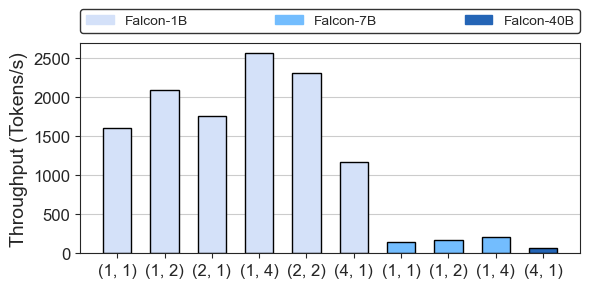

In [6]:
def plot_throughput(batch_size, input_length):
    df = data.copy()
    df['TP_PP'] = data.apply(lambda x: f"({x['tp_size']}, {x['pp_size']})", axis=1)
    df['num_GPU'] = data.apply(lambda x: x['tp_size'] * x['pp_size'], axis=1)
    df = df.drop(columns=['tp_size', 'pp_size', 'num_layers', 'num_heads', 'output_length', 'total_output_tokens', 'total_latency_s'])
    df = df[(df.input_length == input_length) & (df.batch_size == batch_size)]
    df = df.dropna() # drop nan rows (configurations that do not exist/tested/had errors)

    # sns.barplot(x='TP_PP', y='token_per_second', hue='model_name', data=df)

    fig, ax = plt.subplots(1,1,figsize=(6,3))
    width = 0.6  # width of a bar

    labels = df[['model_name', 'TP_PP']]['TP_PP'].values  # x-axis labels
    y = df['token_per_second'].values

    bars = ax.bar(range(len(labels)), y, width=width, color=current_palette[0])

    # Set appropriate colors and labels for models
    stop_1b = df[['model_name', 'TP_PP']].loc[df['model_name'] == 'falcon-rw-1b'].shape[0]
    stop_7b =  df[['model_name', 'TP_PP']].loc[df['model_name'] == 'falcon-7b-instruct'].shape[0] + stop_1b
    stop_40b =  df[['model_name', 'TP_PP']].loc[df['model_name'] == 'falcon-7b-instruct'].shape[0] + stop_7b
    for bar in bars[:stop_1b]:
        bar.set_color(colors['falcon-rw-1b'])
        bar.set_edgecolor('black')
    for bar in bars[stop_1b:stop_7b]:
        bar.set_color(colors['falcon-7b-instruct'])
        bar.set_edgecolor('black')
    for bar in bars[stop_7b:stop_40b]:
        bar.set_color(colors['falcon-40b-instruct'])
        bar.set_edgecolor('black')

    # Create legend
    patch_1b = mpatches.Patch(color=colors['falcon-rw-1b'], label='Falcon-1B')
    patch_7b = mpatches.Patch(color=colors['falcon-7b-instruct'], label='Falcon-7B')
    patch_40b = mpatches.Patch(color=colors['falcon-40b-instruct'], label='Falcon-40B')
    leg = ax.legend(handles=[patch_1b, patch_7b, patch_40b], ncol=3, bbox_to_anchor=(0., 1.05, 1., .102), loc='lower left', mode='expand', borderaxespad=0.)
    leg.get_frame().set_edgecolor('black')

    ax.set_xticks([x for x in range(len(labels))])
    ax.set_xticklabels(labels, fontsize=12)
    ax.tick_params(axis='y', which='major', labelsize=12)

    ax.set_ylabel('Throughput (Tokens/s)', fontsize=14)

    ax.yaxis.grid()
    fig.tight_layout()
    # fig.savefig(f'{figoutpath}/iteration_time.png')
    plt.show()

plot_throughput(batch_size=32, input_length=2048)

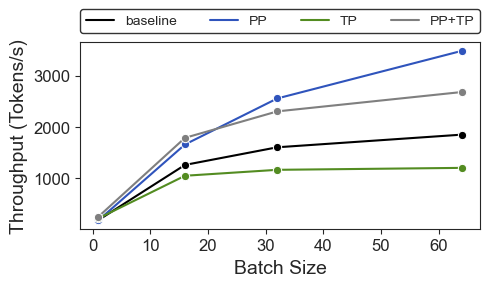

In [7]:
def _fxy(tp_size, pp_size):
    if tp_size > pp_size:
        return 'TP'
    elif pp_size > tp_size:
        return 'PP'
    elif tp_size == 1 and pp_size == 1:
        return 'Baseline'
    return 'TP + PP'

def plot_throughput_vs_batch_size(model_name, input_length):
    df = data.copy()
    df['TP_PP'] = data.apply(lambda x: f"({x['tp_size']}, {x['pp_size']})", axis=1)
    df['parallelism_type'] = data.apply(lambda x: _fxy(x['tp_size'], x['pp_size']), axis=1)
    df['num_GPU'] = data.apply(lambda x: x['tp_size'] * x['pp_size'], axis=1)
    df = df.drop(columns=['tp_size', 'pp_size', 'num_layers', 'num_heads', 'output_length', 'total_output_tokens', 'total_latency_s'])
    df = df[(df.model_name == model_name) & (df.input_length == input_length)]
    df = df[df.num_GPU != 2].sort_values(by='parallelism_type')

    fig, ax = plt.subplots(1,1,figsize=(5,3))
    ax = sns.lineplot(data=df, x='batch_size', y='token_per_second', hue='parallelism_type', ax=ax,
                      marker='o', dashes=False,
                      palette=['black', colors['PP'], colors['TP'], current_palette[7]])
    
    ax.set_ylabel('Throughput (Tokens/s)', fontsize=14)
    ax.set_xlabel('Batch Size', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Create custom legend
    if not model_name == 'falcon-40b-instruct':
        ax.legend_.remove()
        line_baseline = Line2D([0], [0], color='black', label='baseline')
        line_pp = Line2D([0], [0], color=colors['PP'], label='PP')
        line_tp = Line2D([0], [0], color=colors['TP'], label='TP')
        line_both = Line2D([0], [0], color=current_palette[7], label='PP+TP')
        leg = ax.legend(handles=[line_baseline, line_pp, line_tp, line_both], ncol=4, bbox_to_anchor=(0., 1.05, 1., .102), loc='lower left', mode='expand', borderaxespad=0.)
        leg.get_frame().set_edgecolor('black')

    # ax.yaxis.grid()
    fig.tight_layout()
    plt.show()
    return

plot_throughput_vs_batch_size(model_name='falcon-rw-1b', input_length=2048)  # Only Falcon-1B has all configurations tested

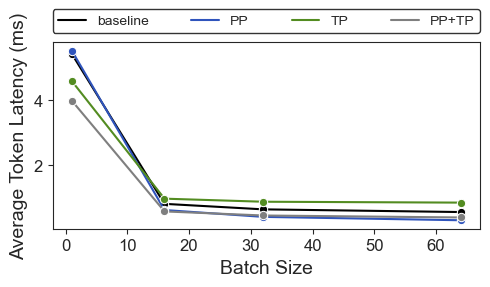

In [8]:
def _fxy(tp_size, pp_size):
    if tp_size > pp_size:
        return 'TP'
    elif pp_size > tp_size:
        return 'PP'
    elif tp_size == 1 and pp_size == 1:
        return 'Baseline'
    return 'TP + PP'

def plot_latency_vs_batch_size(model_name, input_length, plot_type='average'):
    assert plot_type in ['average', 'end_to_end']
    df = data.copy()
    df['TP_PP'] = data.apply(lambda x: f"({x['tp_size']}, {x['pp_size']})", axis=1)
    df['parallelism_type'] = data.apply(lambda x: _fxy(x['tp_size'], x['pp_size']), axis=1)
    df['num_GPU'] = data.apply(lambda x: x['tp_size'] * x['pp_size'], axis=1)
    df = df.drop(columns=['tp_size', 'pp_size', 'num_layers', 'num_heads', 'output_length', 'token_per_second'])
    df = df[(df.model_name == model_name) & (df.input_length == input_length)]
    df = df[df.num_GPU != 2].sort_values(by='parallelism_type')
    df.loc[df.batch_size == 1, ['total_latency_s']] = df.loc[df.batch_size == 1]['total_latency_s'] / 64.
    df.loc[df.batch_size == 16, ['total_latency_s']] = df.loc[df.batch_size == 16]['total_latency_s'] / 4.
    df.loc[df.batch_size == 32, ['total_latency_s']] = df.loc[df.batch_size == 32]['total_latency_s'] / 2.
    df['average_latency_per_token_ms'] = data.apply(lambda x: x['total_latency_s'] / x['total_output_tokens'] * 1e3, axis=1)

    fig, ax = plt.subplots(1,1,figsize=(5,3))
    if plot_type == 'end_to_end':
        ax = sns.lineplot(data=df, x='batch_size', y='total_latency_s', hue='parallelism_type', ax=ax,
                        marker='o', dashes=False,
                        palette=['black', colors['PP'], colors['TP'], current_palette[7]])
        ax.set_ylabel('End-to-End Latency (s)', fontsize=14)
    else:
        ax = sns.lineplot(data=df, x='batch_size', y='average_latency_per_token_ms', hue='parallelism_type', ax=ax,
                        marker='o', dashes=False,
                        palette=['black', colors['PP'], colors['TP'], current_palette[7]])
        ax.set_ylabel('Average Token Latency (ms)', fontsize=14)
    ax.set_xlabel('Batch Size', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Create custom legend
    if not model_name == 'falcon-40b-instruct':
        ax.legend_.remove()
        line_baseline = Line2D([0], [0], color='black', label='baseline')
        line_pp = Line2D([0], [0], color=colors['PP'], label='PP')
        line_tp = Line2D([0], [0], color=colors['TP'], label='TP')
        line_both = Line2D([0], [0], color=current_palette[7], label='PP+TP')
        leg = ax.legend(handles=[line_baseline, line_pp, line_tp, line_both], ncol=4, bbox_to_anchor=(0., 1.05, 1., .102), loc='lower left', mode='expand', borderaxespad=0.)
        leg.get_frame().set_edgecolor('black')

    # ax.yaxis.grid()
    fig.tight_layout()
    plt.show()
    return

plot_latency_vs_batch_size(model_name='falcon-rw-1b', input_length=2048, plot_type='average')  # Only Falcon-1B has all configurations tested

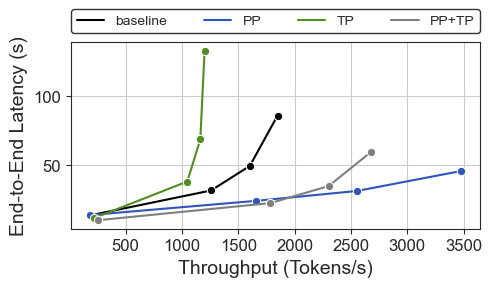

In [11]:
def plot_latency_vs_throughput(model_name, input_length):
    df = data.copy()
    df['TP_PP'] = data.apply(lambda x: f"({x['tp_size']}, {x['pp_size']})", axis=1)
    df['parallelism_type'] = data.apply(lambda x: _fxy(x['tp_size'], x['pp_size']), axis=1)
    df['num_GPU'] = data.apply(lambda x: x['tp_size'] * x['pp_size'], axis=1)
    df = df.drop(columns=['tp_size', 'pp_size', 'num_layers', 'num_heads', 'output_length'])
    df = df[(df.model_name == model_name) & (df.input_length == input_length)]
    df = df[df.num_GPU != 2].sort_values(by='parallelism_type').sort_values(by='batch_size')
    df.loc[df.batch_size == 1, ['total_latency_s']] = df.loc[df.batch_size == 1]['total_latency_s'] / 64.
    df.loc[df.batch_size == 16, ['total_latency_s']] = df.loc[df.batch_size == 16]['total_latency_s'] / 4.
    df.loc[df.batch_size == 32, ['total_latency_s']] = df.loc[df.batch_size == 32]['total_latency_s'] / 2.
    df['average_latency_per_token_ms'] = data.apply(lambda x: x['total_latency_s'] / x['total_output_tokens'] * 1e3, axis=1)

    fig, ax = plt.subplots(1,1,figsize=(5,3))
    ax =sns.lineplot(data=df, x='token_per_second', y='total_latency_s', hue='parallelism_type', marker='o', ax=ax,
        palette=['black', colors['PP'], colors['TP'], current_palette[7]])
    
    ax.set_ylabel('End-to-End Latency (s)', fontsize=14)
    ax.set_xlabel('Throughput (Tokens/s)', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Create custom legend
    if not model_name == 'falcon-40b-instruct':
        ax.legend_.remove()
        line_baseline = Line2D([0], [0], color='black', label='baseline')
        line_pp = Line2D([0], [0], color=colors['PP'], label='PP')
        line_tp = Line2D([0], [0], color=colors['TP'], label='TP')
        line_both = Line2D([0], [0], color=current_palette[7], label='PP+TP')
        leg = ax.legend(handles=[line_baseline, line_pp, line_tp, line_both], ncol=4, bbox_to_anchor=(0., 1.05, 1., .102), loc='lower left', mode='expand', borderaxespad=0.)
        leg.get_frame().set_edgecolor('black')

    ax.yaxis.grid()
    ax.xaxis.grid()
    fig.tight_layout()
    plt.show()
    return

plot_latency_vs_throughput(model_name='falcon-rw-1b', input_length=2048)